<a href="https://colab.research.google.com/github/PritomChaki/Student-Grading-and-Performance-Analysis-System/blob/main/Student_Grading_and_Performance_Analysis_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


Student Grading and Performance Analysis System
1. Add Student
2. Update Student
3. Delete Student
4. View Student
5. Calculate Grades
6. View Class Performance
7. Visualize Data
8. Search Student by ID
9. Filter Students by Grade
10. View Students Failed Any Subject
11. Export Filtered Data
12. Show All Students
13. Exit
Enter your choice: 5
Grades calculated and updated successfully.

Student Grading and Performance Analysis System
1. Add Student
2. Update Student
3. Delete Student
4. View Student
5. Calculate Grades
6. View Class Performance
7. Visualize Data
8. Search Student by ID
9. Filter Students by Grade
10. View Students Failed Any Subject
11. Export Filtered Data
12. Show All Students
13. Exit
Enter your choice: 6
Average Marks: 
Math         85.000000
English      87.333333
Science      85.000000
History      81.000000
Geography    88.000000
dtype: float64

Top Scorer: 
  Student ID     Name  Math  English  Science  History  Geography Grade
1     ST-002      Bob    92     

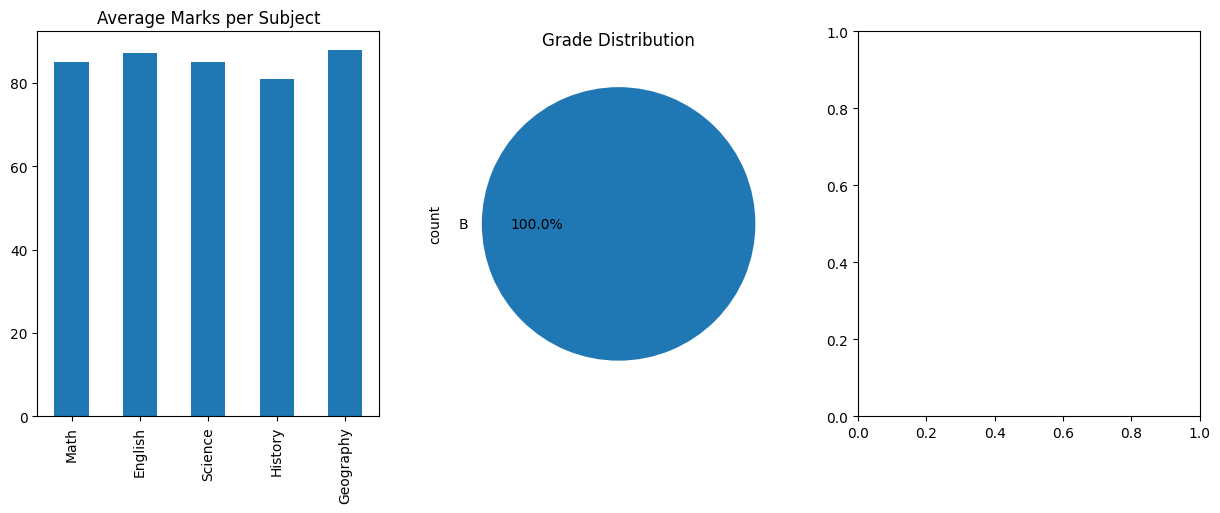

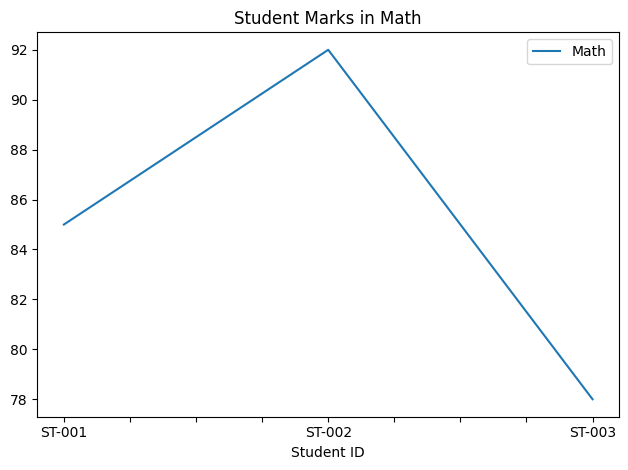


Student Grading and Performance Analysis System
1. Add Student
2. Update Student
3. Delete Student
4. View Student
5. Calculate Grades
6. View Class Performance
7. Visualize Data
8. Search Student by ID
9. Filter Students by Grade
10. View Students Failed Any Subject
11. Export Filtered Data
12. Show All Students
13. Exit
Enter your choice: 10
Empty DataFrame
Columns: [Student ID, Name, Math, English, Science, History, Geography, Grade]
Index: []

Student Grading and Performance Analysis System
1. Add Student
2. Update Student
3. Delete Student
4. View Student
5. Calculate Grades
6. View Class Performance
7. Visualize Data
8. Search Student by ID
9. Filter Students by Grade
10. View Students Failed Any Subject
11. Export Filtered Data
12. Show All Students
13. Exit
Enter your choice: 12
  Student ID     Name  Math  English  Science  History  Geography Grade
0     ST-001    Alice    85       88       90       92         89     B
1     ST-002      Bob    92       79       85       81   

In [2]:
# Task 1: Data Initialization
# Create a CSV file to store initial student data
initial_data = {
    'Student ID': ['ST-001', 'ST-002', 'ST-003'],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 92, 78],
    'English': [88, 79, 95],
    'Science': [90, 85, 80],
    'History': [92, 81, 70],
    'Geography': [89, 87, 88],
    'Grade': ['', '', '']
}
df = pd.DataFrame(initial_data)
df.to_csv('student_data.csv', index=False)

# Load the data
df = pd.read_csv('student_data.csv')

# Task 2: Student Record Management
def add_student(student_id, name, math, english, science, history, geography):
    global df
    if not re.match(r'^ST-\d{3}$', student_id):
        print("Invalid Student ID format. It should be like ST-001.")
        return
    try:
        math, english, science, history, geography = int(math), int(english), int(science), int(history), int(geography)
    except ValueError:
        print("Marks should be numeric.")
        return
    new_student = pd.DataFrame({
        'Student ID': [student_id],
        'Name': [name],
        'Math': [math],
        'English': [english],
        'Science': [science],
        'History': [history],
        'Geography': [geography],
        'Grade': ['']
    })
    df = pd.concat([df, new_student], ignore_index=True)
    df.to_csv('student_data.csv', index=False)
    print(f"Student {name} added successfully.")

def update_student(student_id, subject, new_mark):
    global df
    if student_id in df['Student ID'].values:
        try:
            new_mark = int(new_mark)
        except ValueError:
            print("Marks should be numeric.")
            return
        df.loc[df['Student ID'] == student_id, subject] = new_mark
        df.to_csv('student_data.csv', index=False)
        print(f"Student {student_id}'s {subject} marks updated successfully.")
    else:
        print(f"No student found with ID: {student_id}")

def delete_student(student_id):
    global df
    if student_id in df['Student ID'].values:
        df = df[df['Student ID'] != student_id]
        df.to_csv('student_data.csv', index=False)
        print(f"Student {student_id} deleted successfully.")
    else:
        print(f"No student found with ID: {student_id}")

def read_student(student_id):
    global df
    if student_id in df['Student ID'].values:
        student_data = df[df['Student ID'] == student_id]
        print(student_data)
    else:
        print(f"No student found with ID: {student_id}")

def show_all_students():
    global df
    print(df)

# Task 3: Grade Calculation
def calculate_grades():
    global df
    conditions = [
        (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) >= 90),
        (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) >= 80) & (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) < 90),
        (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) >= 70) & (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) < 80),
        (df[['Math', 'English', 'Science', 'History', 'Geography']].mean(axis=1) < 70)
    ]
    grades = ['A', 'B', 'C', 'F']
    df['Grade'] = np.select(conditions, grades)
    df.to_csv('student_data.csv', index=False)

# Task 4: Class Performance Analysis
def class_performance():
    global df
    avg_marks = df[['Math', 'English', 'Science', 'History', 'Geography']].mean()
    top_scorer = df[['Math', 'English', 'Science', 'History', 'Geography']].idxmax()
    low_scorer = df[['Math', 'English', 'Science', 'History', 'Geography']].idxmin()
    pass_percentage = (df['Grade'] != 'F').mean() * 100
    return avg_marks, top_scorer, low_scorer, pass_percentage

# Task 5: Visualizing Data
def visualize_data():
    global df
    avg_marks = df[['Math', 'English', 'Science', 'History', 'Geography']].mean()

    plt.figure(figsize=(15, 5))

    # Bar chart of average marks per subject
    plt.subplot(1, 3, 1)
    avg_marks.plot(kind='bar')
    plt.title('Average Marks per Subject')

    # Pie chart of grade distribution
    plt.subplot(1, 3, 2)
    df['Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Grade Distribution')

    # Line graph of student marks in a chosen subject
    plt.subplot(1, 3, 3)
    df.plot(x='Student ID', y='Math', kind='line')
    plt.title('Student Marks in Math')

    plt.tight_layout()
    plt.show()

# Task 6: Searching and Filtering
def search_student_by_id(student_id):
    return df[df['Student ID'] == student_id]

def filter_students_by_grade(grade):
    return df[df['Grade'] == grade]

def students_failed_any_subject():
    return df[(df['Math'] < 70) | (df['English'] < 70) | (df['Science'] < 70) | (df['History'] < 70) | (df['Geography'] < 70)]

# Task 7: Export Filtered Data
def export_filtered_data(grade, filename):
    filtered_df = filter_students_by_grade(grade)
    filtered_df.to_csv(filename, index=False)
    print(f"Filtered data exported to {filename}")

# Menu-driven program
def main_menu():
    while True:
        print("\nStudent Grading and Performance Analysis System")
        print("1. Add Student")
        print("2. Update Student")
        print("3. Delete Student")
        print("4. View Student")
        print("5. Calculate Grades")
        print("6. View Class Performance")
        print("7. Visualize Data")
        print("8. Search Student by ID")
        print("9. Filter Students by Grade")
        print("10. View Students Failed Any Subject")
        print("11. Export Filtered Data")
        print("12. Show All Students")
        print("13. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            student_id = input("Enter Student ID: ")
            name = input("Enter Name: ")
            math = input("Enter Math marks: ")
            english = input("Enter English marks: ")
            science = input("Enter Science marks: ")
            history = input("Enter History marks: ")
            geography = input("Enter Geography marks: ")
            add_student(student_id, name, math, english, science, history, geography)

        elif choice == '2':
            student_id = input("Enter Student ID: ")
            subject = input("Enter subject to update (Math/English/Science/History/Geography): ")
            new_mark = input(f"Enter new marks for {subject}: ")
            update_student(student_id, subject, new_mark)

        elif choice == '3':
            student_id = input("Enter Student ID: ")
            delete_student(student_id)

        elif choice == '4':
            student_id = input("Enter Student ID: ")
            read_student(student_id)

        elif choice == '5':
            calculate_grades()
            print("Grades calculated and updated successfully.")

        elif choice == '6':
            avg_marks, top_scorer, low_scorer, pass_percentage = class_performance()
            print(f"Average Marks: \n{avg_marks}\n")
            print(f"Top Scorer: \n{df.loc[top_scorer]}\n")
            print(f"Lowest Scorer: \n{df.loc[low_scorer]}\n")
            print(f"Pass Percentage: {pass_percentage}%\n")

        elif choice == '7':
            visualize_data()

        elif choice == '8':
            student_id = input("Enter Student ID: ")
            print(search_student_by_id(student_id))

        elif choice == '9':
            grade = input("Enter grade to filter by (A/B/C/F): ")
            print(filter_students_by_grade(grade))

        elif choice == '10':
            print(students_failed_any_subject())

        elif choice == '11':
            grade = input("Enter grade to filter by (A/B/C/F): ")
            filename = input("Enter filename to export: ")
            export_filtered_data(grade, filename)

        elif choice == '12':
            show_all_students()

        elif choice == '13':
            print("Exiting program.")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main_menu()